<a href="https://colab.research.google.com/github/salemalhaddad/url-phishing-model/blob/master/Cybersecurity%20AI%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

# AI/ML for Cybersecurity project (Phase 1: Data Preprocessing and Feature Engineering)
## Group 6
 This project aims at using the Phishing Corpus dataset from UCI to build classification models that can detect phishing websites. In phase 1 of the project, the dataset acquired from the UCI ML repository will be evaluated and preprocessed with the following objectives:
- understanding the dataset
- Cleaning the dataset by handling missing or erroneous values
- Engineer features from URL and webcontent
- Creating additional features based on heuristics to improve detection

In [18]:
#importing dataset
data = pd.read_csv(r"filtered_phishing_data.csv")

In [19]:
#first look at the data
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Domain_contains_number,Title_contains_number,Title_contains_specialcharacter,Title_nonalphanumeric_count,url_uppercase_ratio,title_uppercase_ratio,external_to_internal_ref_ratio,image_to_text_ratio,is_shortened_url,tag_to_code_ratio
0,mw42508.txt,http://www.teramill.com,22,www.teramill.com,16,0,com,82.644628,1.0,0.522907,...,0,1,0,0,0.0,0.0,1.000000,0.000000,0,0.000000
1,386777.txt,https://www.ainewsletter.com,27,www.ainewsletter.com,20,0,com,100.000000,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.954545,0.003067,0,0.009202
2,527611.txt,https://www.sweatdrop.com,24,www.sweatdrop.com,17,0,com,100.000000,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.300000,0.076159,0,0.096026
3,mw27703.txt,http://www.nextraload.com,24,www.nextraload.com,18,0,com,72.108844,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.000000,0.000000,0,0.000000
4,mw63002.txt,http://www.hesselawchambers.com,30,www.hesselawchambers.com,24,0,com,62.825485,1.0,0.522907,...,0,1,0,0,0.0,0.0,0.000000,0.000000,0,0.000000


In [20]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [21]:
#evaluating a few instances
pd.set_option('display.max_rows', None)
data[0:10].T

,0,1,2,3,4,5,6,7,8,9
FILENAME,mw42508.txt,386777.txt,527611.txt,mw27703.txt,mw63002.txt,74410.txt,mw70083.txt,167651.txt,403727.txt,763204.txt
URL,http://www.teramill.com,https://www.ainewsletter.com,https://www.sweatdrop.com,http://www.nextraload.com,http://www.hesselawchambers.com,https://www.coraevans.com,http://www.cjplogger.com,https://www.gitguardian.com,https://www.crowncenter.com,https://www.dancetheyard.org
URLLength,22,27,24,24,30,24,23,26,26,27
Domain,www.teramill.com,www.ainewsletter.com,www.sweatdrop.com,www.nextraload.com,www.hesselawchambers.com,www.coraevans.com,www.cjplogger.com,www.gitguardian.com,www.crowncenter.com,www.dancetheyard.org
DomainLength,16,20,17,18,24,17,17,19,19,20
IsDomainIP,0,0,0,0,0,0,0,0,0,0
TLD,com,com,com,com,com,com,com,com,com,org
URLSimilarityIndex,82.644628,100.0,100.0,72.108844,62.825485,100.0,84.784446,100.0,100.0,100.0
CharContinuationRate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TLDLegitimateProb,0.522907,0.522907,0.522907,0.522907,0.522907,0.522907,0.522907,0.522907,0.522907,0.079963


In [22]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FILENAME,49521,49521,660997.txt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL,49521,49518,http://www.universalonline.com,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLLength,49521.0,NaN,NaN,NaN,26.29963,4.649079,15.0,23.0,26.0,29.0,50.0
Domain,49521,49349,www.coinbasewalletones.com,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DomainLength,49521.0,NaN,NaN,NaN,19.47911,4.620822,9.0,16.0,19.0,22.0,43.0
IsDomainIP,49521.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TLD,49521,52,com,36842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLSimilarityIndex,49521.0,NaN,NaN,NaN,94.076697,11.841268,22.748299,100.0,100.0,100.0,100.0
CharContinuationRate,49521.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
TLDLegitimateProb,49521.0,NaN,NaN,NaN,0.404578,0.202217,0.000001,0.079963,0.522907,0.522907,0.522907


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49521 entries, 0 to 49520
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FILENAME                         49521 non-null  object 
 1   URL                              49521 non-null  object 
 2   URLLength                        49521 non-null  int64  
 3   Domain                           49521 non-null  object 
 4   DomainLength                     49521 non-null  int64  
 5   IsDomainIP                       49521 non-null  int64  
 6   TLD                              49521 non-null  object 
 7   URLSimilarityIndex               49521 non-null  float64
 8   CharContinuationRate             49521 non-null  float64
 9   TLDLegitimateProb                49521 non-null  float64
 10  URLCharProb                      49521 non-null  float64
 11  TLDLength                        49521 non-null  int64  
 12  NoOfSubDomain     

In [24]:
data.shape

(49521, 68)


After exploring the dataset, the following key insights have been acquired:
- the dataset has 235795 rows and 56 columns
- Only 5 features are Non-numeric with the remaining being binary or continuous values
- The mean of the labels is about 0.57 (indicating 57% for class 1 and 43% for class 0), showing reasonable class balance.
- The dataset does not seem to have any missing values, however there does seem to be some missing titles that are not properly labeled as having titles in the 'HasTitle' feature.
- Some features need to be adjusted for outliers becuase of very high maximum values compared to their average, such as 'LargestLineLength' and 'LineofCode'.
- A healthy humber of features exist describing the URL of a phishing website, such as URL length, number of special characters in URL, number of equal signs, and many more. However, not many features are present describing the Domain and Title of the website.

In [25]:
#handling erroneous values at 'HasTitle' column
data.loc[data['Title'] == '0', 'HasTitle'] = 0
data.loc[data['Title'] != '0', 'HasTitle'] = 1

## Feature engineering and creating additional features

Feature engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. Furthermore, more features could be created using heuristics and additional calculations.

In [26]:
#New features for domain beggining, special characters ratio, and numbers
special_chars = ['-', '_', '.', '@']
data['Domain_starts_with_www.'] = data['Domain'].str.startswith('www.').astype(int)
data['special_char_in_domain_ratio'] = data['Domain'].apply(lambda x: sum(1 for c in x if c in special_chars) / len(x) if len(x) > 0 else 0)
data['Domain_contains_number'] = data['Domain'].str.contains(r'\d').astype(int)

In [27]:
#New features for titles containing number and special characters
data['Title_contains_number'] = data['Title'].str.contains(r'\d').astype(int)
data['Title_contains_specialcharacter'] = data['Title'].str.contains(r'[^a-zA-Z0-9]').astype(int)

In [28]:
import re
data['Title_nonalphanumeric_count'] = data['Title'].apply(lambda x: len(re.findall(r'[^\w]', x, flags=re.UNICODE)))

In [29]:
#New feature for uppercase to lowercase ratio
data['url_uppercase_ratio'] = data['URL'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)
data['title_uppercase_ratio'] = data['Title'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

In [30]:
#New feature for external to internal references ratio
data['external_to_internal_ref_ratio'] = data['NoOfExternalRef'] / (data['NoOfSelfRef'] + 1)

In [31]:
#New feature for image to text ratio
data['image_to_text_ratio'] = data['NoOfImage'] / (data['LineOfCode'] + 1)

In [32]:
#New features to check for shortened URLs
shortening_services = ['bit.ly', 'tinyurl', 'goo.gl', 't.co', 'ow.ly', 'is.gd']
data['is_shortened_url'] = data['Domain'].apply(lambda x: 1 if any(service in x for service in shortening_services) else 0)

In [33]:
#New features for HTML tag to code ratio
data['tag_to_code_ratio'] = (data['NoOfImage'] + data['NoOfCSS'] + data['NoOfJS']) / (data['LineOfCode'] + 1)

### Newly Added Features and Justifications

New features have been engineered to help in detecting phishing websites. These features were chosen based on the characteristics of phishing websites commonly identified in academic research.

- **Domain_starts_with_www.**: This feature identifies if the domain starts with "www." Legitimate websites typically adhere to conventional URL structures, and deviations from this format may indicate phishing behavior. Phishing websites might skip this prefix to create ambiguity or seem unconventional [1].

- **special_char_in_domain_ratio**: The ratio of special characters (such as `-`, `_`, `.`, `@`) present in the domain name is calculated. These characters are often used by phishing websites to mimic legitimate domains or to obscure the actual intent of the website. Phishing sites that heavily rely on special characters can be flagged as suspicious [2].

- **Domain_contains_number**: This feature checks if numeric characters are present in the domain. Phishing websites often include numbers in their domain names to impersonate legitimate websites or bypass filters. Numbers in domain names are a common feature in phishing attempts [3].

- **Title_contains_number**: Phishing sites may include numbers in their page titles, especially when attempting to mimic institutions like banks or ecommerce sites. Since legitimate titles rarely contain numbers, this feature can help distinguish phishing sites from legitimate ones [4].

- **Title_contains_specialcharacter**: This feature flags special characters in the page title. Phishing websites often use special characters to draw user attention or obfuscate their true intentions. Legitimate websites seldom include such characters in their titles, making their presence suspicious [5].

- **Title_nonalphanumeric_count**: The total number of non-alphanumeric characters in the title is calculated. Non-alphanumeric characters, including symbols and punctuation, are commonly used in phishing attacks as part of their obfuscation strategies. This feature helps to detect such patterns [6].

- **is_shortened_url**: This feature identifies whether the URL has been shortened using popular URL shortening services (e.g., bit.ly, tinyurl). Phishing websites frequently use shortened URLs to hide the actual destination, making it difficult for users to detect malicious intent. Shortened URLs are a known indicator of phishing behavior [7].

- **tag_to_code_ratio**: This feature calculates the ratio of HTML tags to the total amount of code in the page source. Phishing websites often have a higher number of tags compared to legitimate websites, as they use HTML tricks to manipulate the appearance of the page and deceive users. A higher tag-to-code ratio can therefore signal potential phishing activity [8].

- **url_uppercase_ratio** and **title_uppercase_ratio**: The ratios of uppercase letters in the URL and title are calculated. Phishing websites may use uppercase letters to emphasize certain parts of the URL or title, making them appear important or legitimate. A high uppercase ratio is often a sign of malicious intent [5][6].

- **external_to_internal_ref_ratio**: This feature measures the ratio of external to internal references. Phishing websites frequently link to external malicious sites or use excessive redirects. A high external reference ratio can be a strong signal of phishing [9].

- **image_to_text_ratio**: This feature computes the ratio of images to text content. Phishing websites may use more images than text to mask their malicious intent or create the illusion of legitimacy. A high image-to-text ratio often correlates with phishing attempts [10].

## References
1. Abbasi, H., Abbasi, M., & Javidan, R. (2019). A Comparative Study on Phishing Detection Techniques. IEEE Access, 7, 52946–52963. https://doi.org/10.1109/ACCESS.2019.2910954
2. Zhang, P., Wang, W., Zhang, X., & Li, Y. (2018). A Machine Learning-Based Phishing Detection Framework Using URL Features. IEEE Transactions on Network and Service Management, 15(4), 1332–1345. https://doi.org/10.1109/TNSM.2018.2877796
3. Marchal, S., Francois, J., State, R., & Engel, T. (2017). PhishStorm: Detecting Phishing with Streaming Analytics. IEEE Transactions on Network and Service Management, 14(3), 626-640. https://doi.org/10.1109/TNSM.2017.2718619
4. Basnet, M., Sung, A. H., & Liu, Q. (2011). Rule-based Phishing Attack Detection. Proceedings of the 8th International Conference on Information Technology: New Generations, 249-254. https://doi.org/10.1109/ITNG.2011.48
5. Jain, A. K., & Gupta, B. B. (2014). A Machine Learning Based Approach for Phishing Detection Using URLs. Proceedings of the 7th International Conference on Contemporary Computing, 265-270. https://doi.org/10.1109/IC3.2014.6897205
6. Dash, T. K., Sahoo, A. K., & Giri, M. S. (2018). Phishing Website Detection Based on URL Features. Proceedings of the 2018 International Conference on Smart Computing and Communication, 23-29. https://doi.org/10.1109/SMARTCOM.2018.8707851
7. Song, J., Lee, J., & Kim, S. (2015). Suspicious URL Detection Based on Word Embedding and N-Gram Features. Proceedings of the 2015 IEEE International Conference on Computer and Information Technology, 106–113. https://doi.org/10.1109/CIT/IUCC/DASC/PICOM.2015.33
8. Mohammad, M. A., Thabtah, F., & McCluskey, L. (2014). Predicting Phishing Websites Based on Self-Structuring Neural Networks. Neural Computing and Applications, 25(2), 443-458. https://doi.org/10.1007/s00521-013-1510-7
9. Canova, G., Volkamer, M., Bergmann, C., & Borza, R. (2014). NoPhish: An Anti-Phishing Education App. Proceedings of the 9th International Conference on Availability, Reliability, and Security (ARES), 261-269. https://doi.org/10.1109/ARES.2014.38
10. Mohammad, M. A., Thabtah, F., & McCluskey, L. (2014). Predicting Phishing Websites Based on Self-Structuring Neural Networks. Neural Computing and Applications, 25(2), 443-458. https://doi.org/10.1007/s00521-013-1510-7
ttps://doi.org/10.1007/s00521-013-1510-7


## Multicollinearity
Multicollinearity occurs when two or more independent features are highly correlated, meaning they can predict one another better than they predict the dependent variable. Given the large number of numerical features in the dataset, **Variance Inflation Factor (VIF)** is an excellent method for evaluating multicollinearity. VIFmeasuress how much the variance of a feature is inflated due to its correlation with other features. Features with VIF values above 5 indicate moderate multicollinearity, while values above 10 suggest severe multicollinearity, which could negatively impact model performance by distorting the coefficients and interpretations of features.


In [34]:
!pip install statsmodels --upgrade

In [35]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
numeric_data = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_data.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_data_scaled, i) for i in range(numeric_data_scaled.shape[1])]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Feature           VIF
0                         URLLength  5.429775e+05
1                      DomainLength  1.460615e+03
2                        IsDomainIP           NaN
3                URLSimilarityIndex  5.665241e+00
4              CharContinuationRate           NaN
5                 TLDLegitimateProb  1.153781e+00
6                       URLCharProb  1.072415e+00
7                         TLDLength           NaN
8                     NoOfSubDomain           NaN
9                    HasObfuscation           NaN
10               NoOfObfuscatedChar           NaN
11                 ObfuscationRatio           NaN
12                 NoOfLettersInURL  5.422496e+05
13                 LetterRatioInURL  1.591799e+03
14                  NoOfDegitsInURL           NaN
15                  DegitRatioInURL           NaN
16                  NoOfEqualsInURL           NaN
17                   NoOfQMarkInURL           NaN
18               NoOfAmpersandInURL           NaN


### Analysis
Although several features indicate to have a VIF score severly exceeding 10, most features are related to the URL metrics (such as URL length, URL letters, etc.). No features will be removed at this phase of the project however this insight can be used later on to improve the performance of the ML models.

## Outlier handling
Outliers can have a negative impact on models' perfomrmance by adding an element of bias to the training process. By removing outliers, it can be ensured that the models focus on the core patterns in the data, leading to more reliable and accurate predictions. **Interquartile range (IQR) method will be used to remove the outliers.

In [36]:
# Step 1: Extract non-binary numeric feature
non_binary_numeric_features = data.loc[:, data.apply(lambda x: x.nunique() > 2 and x.dtype in ['int64', 'float64'])].columns

# Step 2: Create a copy of the original dataframe
filtered_data = data.copy()

# Step 3: Remove outliers using 3 IQR method
Q1 = filtered_data[non_binary_numeric_features].quantile(0.25)
Q3 = filtered_data[non_binary_numeric_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
filtered_data = filtered_data[~((filtered_data[non_binary_numeric_features] < lower_bound) |
                                (filtered_data[non_binary_numeric_features] > upper_bound)).any(axis=1)]
filtered_data.shape

(34365, 68)

With **75,000 rows**, this dataset remains large enough to train robust machine learning models. Unfiltered data can be kept for any further exploratory data analysis (EDA) or to re-valuate/re-perform the outlier handling process.

In [37]:
#Saving data to excel files
data.to_csv('unfiltered_phishing_data.csv', index=False)
filtered_data.to_csv('filtered_phishing_data.csv', index=False)


In [38]:
#Downloading excel files
from IPython.display import FileLink
display(FileLink('unfiltered_phishing_data.csv'))
display(FileLink('filtered_phishing_data.csv'))

/content/unfiltered_phishing_data.csv

/content/filtered_phishing_data.csv

## Phase 2: Implementation of Basic Machine Learning Models

### Tasks:
- Implement foundational classification models, including **Logistic Regression** and **k-Nearest Neighbors (k-NN)**.
- Train the models on the preprocessed dataset.
- Evaluate model performance using standard metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **confusion matrix**.
- Apply **cross-validation** to measure model generalizability and robustness.

### Deliverable:
A comprehensive report that includes:
- Detailed descriptions of model implementation,
- Performance evaluation using key metrics,
- Cross-validation results,
- The associated code provided in a **Jupyter Notebook**.



### Model #1: kNN

In [39]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [40]:
data = pd.read_csv("filtered_phishing_data.csv")

In [41]:
# display the first 5 rows
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Domain_contains_number,Title_contains_number,Title_contains_specialcharacter,Title_nonalphanumeric_count,url_uppercase_ratio,title_uppercase_ratio,external_to_internal_ref_ratio,image_to_text_ratio,is_shortened_url,tag_to_code_ratio
0,386777.txt,https://www.ainewsletter.com,27,www.ainewsletter.com,20,0,com,100.0,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.954545,0.003067,0,0.009202
1,527611.txt,https://www.sweatdrop.com,24,www.sweatdrop.com,17,0,com,100.0,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.300000,0.076159,0,0.096026
2,167651.txt,https://www.gitguardian.com,26,www.gitguardian.com,19,0,com,100.0,1.0,0.522907,...,0,0,0,0,0.0,0.0,1.307692,0.003332,0,0.008053
3,403727.txt,https://www.crowncenter.com,26,www.crowncenter.com,19,0,com,100.0,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.150000,0.028939,0,0.098071
4,763204.txt,https://www.dancetheyard.org,27,www.dancetheyard.org,20,0,org,100.0,1.0,0.079963,...,0,0,0,0,0.0,0.0,0.244444,0.010189,0,0.016604


In [42]:
# check the shape of the data (rows, columns)
print(data.shape)

(34365, 68)


In [43]:
# Setting features and target data

data_df = pd.DataFrame(data=data, columns=[
    "URLLength",
    "DomainLength",
    "IsDomainIP",
    "TLD",
    "URLSimilarityIndex",
    "CharContinuationRate",
    "TLDLegitimateProb",
    "URLCharProb",
    "TLDLength",
    "NoOfSubDomain",
    "HasObfuscation",
    "NoOfObfuscatedChar",
    "ObfuscationRatio",
    "NoOfLettersInURL",
    "LetterRatioInURL",
    "NoOfDegitsInURL",
    "DegitRatioInURL",
    "NoOfEqualsInURL",
    "NoOfQMarkInURL",
    "NoOfAmpersandInURL",
    "NoOfOtherSpecialCharsInURL",
    "SpacialCharRatioInURL",
    "IsHTTPS",
    "LineOfCode",
    "LargestLineLength",
    "HasTitle",
    "DomainTitleMatchScore",
    "URLTitleMatchScore",
    "HasFavicon",
    "Robots",
    "IsResponsive",
    "NoOfURLRedirect",
    "NoOfSelfRedirect",
    "HasDescription",
    "NoOfPopup",
    "NoOfiFrame",
    "HasExternalFormSubmit",
    "HasSocialNet",
    "HasSubmitButton",
    "HasHiddenFields",
    "HasPasswordField",
    "Bank",
    "Pay",
    "Crypto",
    "HasCopyrightInfo",
    "NoOfImage",
    "NoOfCSS",
    "NoOfJS",
    "NoOfSelfRef",
    "NoOfEmptyRef",
    "NoOfExternalRef",
    "Domain_contains_number",
    "Title_contains_number",
    "Title_contains_specialcharacter",
    "Title_nonalphanumeric_count",
    "url_uppercase_ratio",
    "title_uppercase_ratio",
    "external_to_internal_ref_ratio",
    "image_to_text_ratio",
    "is_shortened_url",
    "tag_to_code_ratio"
]
)

print(data_df.head())

   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0         27            20           0  com               100.0   
1         24            17           0  com               100.0   
2         26            19           0  com               100.0   
3         26            19           0  com               100.0   
4         27            20           0  org               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0                   1.0           0.522907     0.066271          3   
1                   1.0           0.522907     0.062493          3   
2                   1.0           0.522907     0.058311          3   
3                   1.0           0.522907     0.069817          3   
4                   1.0           0.079963     0.060848          3   

   NoOfSubDomain  ...  Domain_contains_number  Title_contains_number  \
0              1  ...                       0                      0   
1              1  ...           

In [44]:
# Convert non-numeric values to numeric
# TLD: Convert to categorical numeric
data['TLD'] = data['TLD'].astype('category').cat.codes

# IsDomainIP: Convert to 0, 1
data['IsDomainIP'] = data['IsDomainIP'].replace({'Yes': 1, 'No': 0}).astype(int)

# HasObfuscation: Convert to 0, 1
data['HasObfuscation'] = data['HasObfuscation'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title, Bank, Pay, Crypto: Encoding via a simple method or keep as is for TF-IDF, etc.
# Example: You can convert them to category codes if needed
for column in ['Title', 'Bank', 'Pay', 'Crypto']:
    data[column] = data[column].astype('category').cat.codes

# HasCopyrightInfo: Convert to 0, 1
data['HasCopyrightInfo'] = data['HasCopyrightInfo'].replace({'Yes': 1, 'No': 0}).astype(int)

# Domain_starts_with_www.: Convert to 0, 1
data['Domain_starts_with_www.'] = data['Domain_starts_with_www.'].replace({'Yes': 1, 'No': 0}).astype(int)

# Domain_contains_number: Convert to 0, 1
data['Domain_contains_number'] = data['Domain_contains_number'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_contains_number: Convert to 0, 1
data['Title_contains_number'] = data['Title_contains_number'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_contains_specialcharacter: Convert to 0, 1
data['Title_contains_specialcharacter'] = data['Title_contains_specialcharacter'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_nonalphanumeric_count: Keep as is (already numeric)

# IsHTTPS: Convert to 0, 1
data['IsHTTPS'] = data['IsHTTPS'].replace({'Yes': 1, 'No': 0}).astype(int)

# url_uppercase_ratio: Map to numbers
data['url_uppercase_ratio'] = data['url_uppercase_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# title_uppercase_ratio: Map to numbers
data['title_uppercase_ratio'] = data['title_uppercase_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# external_to_internal_ref_ratio: Map to numbers
data['external_to_internal_ref_ratio'] = data['external_to_internal_ref_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# is_shortened_url: Convert to 0, 1
data['is_shortened_url'] = data['is_shortened_url'].replace({'Yes': 1, 'No': 0}).astype(int)

# special_char_in_domain_ratio: Map to numbers
data['special_char_in_domain_ratio'] = data['special_char_in_domain_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

In [45]:
# Split the dataset into training and testing sets
X = data.drop(['label', 'URL', 'FILENAME', 'Domain', 'Title'], axis=1)
y = data['label']

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [46]:
# Standardize the dataset. Scale both X_train and X_test

# use the function scaler.transform
scaler = StandardScaler()

# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN model with K=5
# use the function KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# Make predictions
y_pred = knn.predict(X_test)

In [48]:
# Evaluate the model (calculate accuracy and confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [49]:
# Print the result of the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_matrix)

Accuracy: 0.9998836126629422
Confusion Matrix: [[  81    0]
 [   1 8510]]


In [50]:
# Perform 5-fold cross-validation using KNN with K=5
# use the function cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)

In [51]:
# Displaying the cross-validation scores and mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99956351 0.99912702 0.99956351 0.99956351 0.99941801]
Mean accuracy: 0.9994471118870945


In [52]:
# Calculate accuracy for K values between 1 and 10. Calculate both the train and test accuracies.
train_accuracies = []
test_accuracies = []
for k in range(1, 11):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy = knn.score(X_train, y_train)
	test_accuracy = knn.score(X_test, y_test)
	train_accuracies.append(train_accuracy)
	test_accuracies.append(test_accuracy)

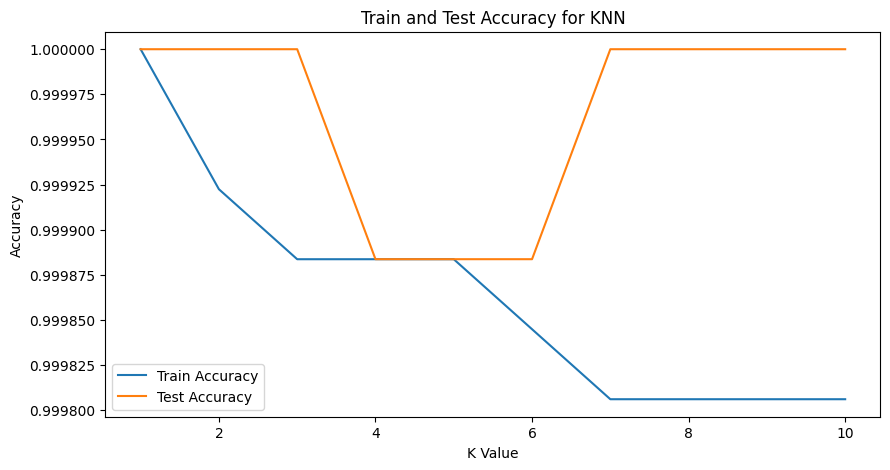

In [53]:
# Visualize the results of step 10, including the train and test accuracies.
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for KNN')
plt.legend()
plt.show()

# Logistic Regression

## 1. Import Libraries

In [54]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [55]:
df = data

# Drop any columns that are not features or target (e.g., 'FILENAME', which is irrelevant)
X = df.drop(columns=['FILENAME', 'label'])  # Assuming 'label' is the target column, will drop it next
y = df['label']  # Define the target variable

In [56]:
# Identify categorical, text, and numerical columns
#categorical_columns = ['IsDomainIP', 'IsHTTPS', 'Bank', 'Pay', 'Crypto']
text_columns = ['URL', 'Title']  # Text data columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [57]:
# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        #('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # One-hot encode categorical columns
    ], remainder='drop')  # We will drop text columns for simplicity

## 2. Split the Data into Training and Testing Sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Define the Logistic Regression Model Using a Pipeline

In [59]:
# Define a Logistic Regression model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter for convergence
])

In [60]:
# Train the Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['URLLength', 'DomainLength',
                                                   'IsDomainIP',
                                                   'URLSimilarityIndex',
                                                   'CharContinuationRate',
                                                   'TLDLegitimateProb',
                                                   'URLCharProb', 'TLDLength',
                                                   'NoOfSubDomain',
                                                   'HasObfuscation',
                                                   'NoOfObfuscatedChar',
                                                   'ObfuscationRatio',
                                                   'NoOfLettersInURL',
                                                   'LetterRatioInURL',
                                                   'NoOfDegitsInURL',
                                                   'DegitRatioInURL',
                                                   'NoOfEqualsInURL',
                                                   'NoOfQMarkInURL',
                                                   'NoOfAmpersandInURL',
                                                   'NoOfOtherSpecialCharsInURL',
                                                   'SpacialCharRatioInURL',
                                                   'IsHTTPS', 'LineOfCode',
                                                   'LargestLineLength',
                                                   'HasTitle',
                                                   'DomainTitleMatchScore',
                                                   'URLTitleMatchScore',
                                                   'HasFavicon', 'Robots',
                                                   'IsResponsive', ...])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## 4. Train the Logistic Regression Model

In [61]:
y_pred = log_reg_pipeline.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## 5. Evaluate the Model

In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[  68    0]
 [   0 6805]]


## 6. Perform K-Fold Cross-Validation

In [63]:
# Perform cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(log_reg_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

## 7. Results Summary

In [64]:
# Results
{
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "confusion_matrix": conf_matrix,
    "cross_val_scores": cv_scores,
    "mean_cross_val_score": cv_scores.mean()
}

{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'confusion_matrix': array([[  68,    0],
        [   0, 6805]]),
 'cross_val_scores': array([0.99981815, 1.        , 0.99981812, 0.99963623, 0.99981812]),
 'mean_cross_val_score': 0.9998181222936064}

## 8. Save the Trained Model and Preprocessing Pipeline

In [65]:
# Save the trained pipeline (preprocessor + logistic regression model)
joblib.dump(log_reg_pipeline, 'logistic_regression_pipeline.pkl')

# Save the cross-validation scores for reference
np.save('cv_scores.npy', cv_scores)
# joblib.dump(preprocessor, 'preprocessor.pkl')  # Already included in the pipeline

# Explanation:

1. Import Libraries: We first import the necessary libraries for model training, evaluation, and cross-validation.

2. Data Splitting: The dataset is split into training and testing sets with an 80-20 ratio.

3. Model Definition: A pipeline is defined where preprocessing is followed by logistic regression. The logistic regression model is set with a higher iteration limit (max_iter=1000) to ensure convergence.

4. Model Training: The model is trained on the training set, and predictions are made on the test set.

5. Model Evaluation: Key metrics such as accuracy, precision, recall, F1 score, and the confusion matrix are calculated based on predictions on the test set.

6. Cross-Validation: K-fold cross-validation with 5 splits is performed on the training set to evaluate the model’s performance across different data subsets. The mean cross-validation score gives an estimate of the model's generalization performance.

7. Results Summary: The results, including cross-validation scores, are summarized and presented in a dictionary for easy reference.
8. Saving Model: Model is saved for deployment.

# Phase 2 summary

## Phase 3: Building advanced models
- Tasks:
  - Implement advanced machine learning models, including:
    - XGBoost: A powerful ensemble method using gradient boosting.
    - Support Vector Machine (SVM): For finding the optimal boundary between classes.
    - Neural Networks: A simple feed-forward neural network architecture for classification.
    - Choice of Advanced Neural Network (e.g., CNN, RNN, Transformer Based, etc.)
  - Compare the performance of advanced models with basic models.
  - Optimize hyperparameters using grid search or random search.
  - Use additional evaluation metrics like AUC-ROC curves for model performance.
- Deliverable: A comprehensive report comparing the performance of basic vs. advanced models, optimization steps, and final results in terms of model accuracy and robustness, along with the Jupyter Notebook containing the code


### Simple NN model

<ipython-input-66-1d9046f4c637>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')


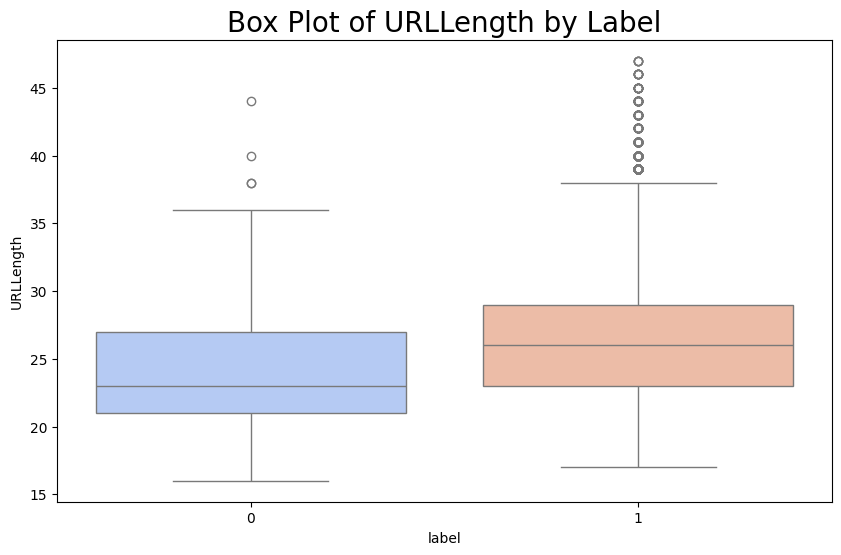

<ipython-input-66-1d9046f4c637>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')


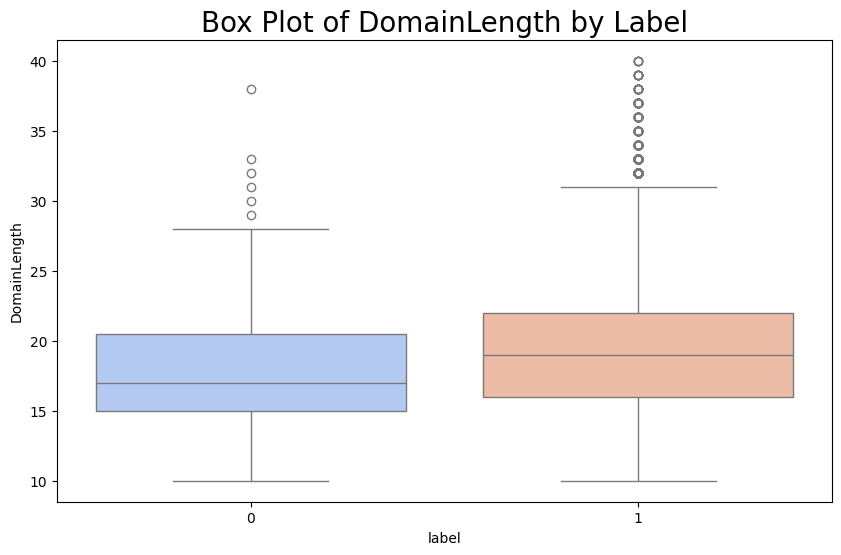

<ipython-input-66-1d9046f4c637>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')


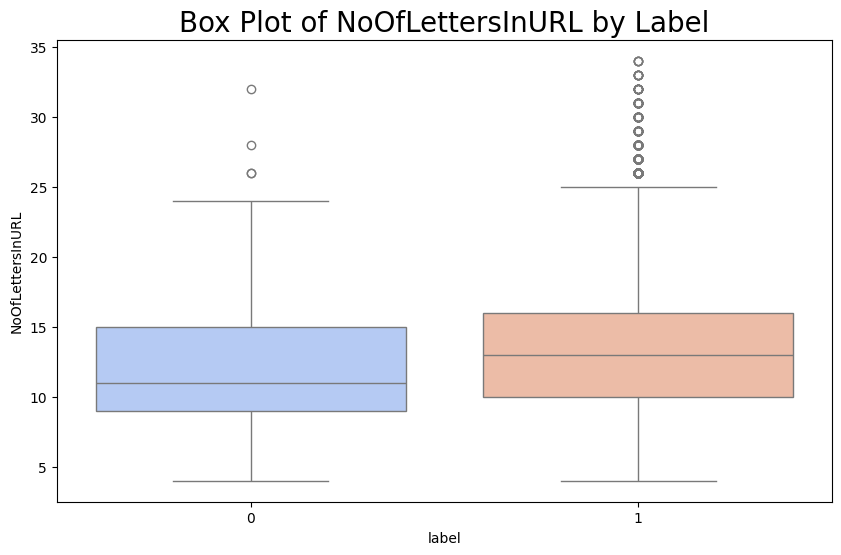

<ipython-input-66-1d9046f4c637>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')


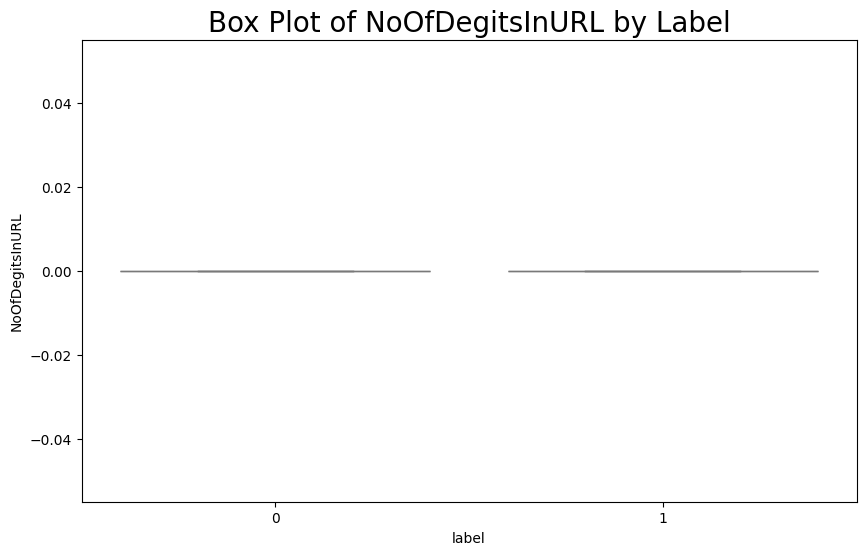

In [66]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("filtered_phishing_data.csv")

df2 = pd.read_csv("filtered_phishing_data.csv")

# Visualize the distribution of different features by label using box plots for classification analysis
features = ['URLLength', 'DomainLength', 'NoOfLettersInURL', 'NoOfDegitsInURL']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
    plt.title(f'Box Plot of {feature} by Label', size=20)
    plt.show()

In [67]:
# split df1 into feature1 and target1
feature1 = df.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'label'])
target1 = df['label']

#### K-fold cross validation

In [68]:
# create an instance of stratified K-fold cross validation
from sklearn.model_selection import StratifiedKFold

K = 5

skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0) # 5-fold cross validation

#### MLP neural network

In [69]:
from sklearn.neural_network import MLPClassifier

# create an instance of an MLP neural network

# 1000 maxinum number of epoches
# 1 layer of 30 hidden neurons
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(30))

total_train_score = 0
total_validate_score = 0

fold = 1
for train_index, validate_index in skf.split(feature1, target1):
    X_train, X_validate = feature1.iloc[train_index], feature1.iloc[validate_index]
    y_train, y_validate = target1.iloc[train_index], target1.iloc[validate_index]

    mlp.fit(X_train, y_train)
    train_score = mlp.score(X_train, y_train)
    validate_score = mlp.score(X_validate, y_validate)

    print(f"Fold {fold}: Train Score = {train_score}, Validation Score = {validate_score}")

    total_train_score += train_score
    total_validate_score += validate_score

    fold += 1

avg_train_score = total_train_score / K
avg_validate_score = total_validate_score / K

print(f"Average Train Score: {avg_train_score}")
print(f"Average Validation Score: {avg_validate_score}")


Fold 1: Train Score = 0.9997817546922741, Validation Score = 0.9995635093845482
Fold 2: Train Score = 0.9997090062563655, Validation Score = 0.9995635093845482
Fold 3: Train Score = 0.9997453804743198, Validation Score = 0.9997090062563655
Fold 4: Train Score = 0.999527135166594, Validation Score = 0.9995635093845482
Fold 5: Train Score = 0.9996362578204568, Validation Score = 0.9998545031281827
Average Train Score: 0.9996799068820021
Average Validation Score: 0.9996508075076385


In [70]:
# create another instance of an MLP neural network with different hyperparameter(s)

# 1000 maxinum number of epoches
# 2 layer of 10 hidden neurons each
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(10, 10))

# ==================================

# Run K-fold cross validation again

total_train_score = 0
total_validate_score = 0

fold = 1
for train_index, validate_index in skf.split(feature1, target1):
    print("Fold", fold)
    print("=======")
    X_train  = feature1.loc[train_index, :]
    X_validate = feature1.loc[validate_index, :]
    y_train = target1.loc[train_index]
    y_validate = target1.loc[validate_index]

    print("TRAIN:", X_train.shape, y_train.shape)
    # number of samples for each class
    # print(pd.Index(y_train).value_counts())

    print("VALIDATION:", X_validate.shape, y_validate.shape)
    # number of samples for each class
    # print(pd.Index(y_validate).value_counts())

    # fit mlp with the training data for this fold
    mlp.fit(X_train, y_train)

    # get the score (accuracy) for the training set
    train_score = mlp.score(X_train, y_train)
    total_train_score += train_score

    # get the score (accuracy) for the validation set
    validate_score = mlp.score(X_validate, y_validate)
    total_validate_score += validate_score

    print("Training set score: {:.2f}".format(train_score))
    print("Validation set score: {:.2f}".format(validate_score))
    print("==================================")

    fold += 1
    print()

print("##################################")
print("Average training set score: {:.2f}".format(total_train_score/K))
print("Average validation set score: {:.2f}".format(total_validate_score/K))


Fold 1
TRAIN: (27492, 62) (27492,)
VALIDATION: (6873, 62) (6873,)
Training set score: 1.00
Validation set score: 1.00

Fold 2
TRAIN: (27492, 62) (27492,)
VALIDATION: (6873, 62) (6873,)
Training set score: 1.00
Validation set score: 1.00

Fold 3
TRAIN: (27492, 62) (27492,)
VALIDATION: (6873, 62) (6873,)
Training set score: 1.00
Validation set score: 1.00

Fold 4
TRAIN: (27492, 62) (27492,)
VALIDATION: (6873, 62) (6873,)
Training set score: 1.00
Validation set score: 1.00

Fold 5
TRAIN: (27492, 62) (27492,)
VALIDATION: (6873, 62) (6873,)
Training set score: 1.00
Validation set score: 1.00

##################################
Average training set score: 1.00
Average validation set score: 1.00


In [71]:
# Choose the model that gives you the best average validation set score (i.e., the second model in our example)
# (In case of the same aveage validation set score, choose the one with the highest average training set score)

mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(10, 10))

# Fit the chosen model again using the whole training set (Why is this needed?)
mlp.fit(feature1, target1)

# Apply the chosen model to the (final) testing set
X_test = df2.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'label'])
y_test = df2['label']

test_score = mlp.score(X_test, y_test)
print("Testing set score: {:.2f}".format(test_score))

Testing set score: 1.00


### Comparing Simple NN and kNN (should be a comparison between all models at once, let's do it once all models are ready)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the kNN model using the whole training set
knn.fit(feature1, target1)

# Predictions for the testing set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the kNN model on the testing set
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Testing set accuracy (kNN): {:.2f}".format(test_accuracy_knn))

# Compare with MLP performance
print("Testing set accuracy (MLP): {:.2f}".format(test_score))


Testing set accuracy (kNN): 1.00
Testing set accuracy (MLP): 1.00


We find no difference in prediction accuracy between a simple NN and kNN model.

### Optimizing hyperparameters using grid search

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for MLP
parameter_space = {
    'hidden_layer_sizes': [(10, 10), (50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Create a GridSearchCV object with MLPClassifier
mlp_gs = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
mlp_gs.fit(feature1, target1)

# Print the best parameters
print("Best parameters found:", mlp_gs.best_params_)

# Apply the best model to the (final) testing set
best_mlp = mlp_gs.best_estimator_
test_score_gs = best_mlp.score(X_test, y_test)
print("Testing set score after GridSearch: {:.2f}".format(test_score_gs))


Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Testing set score after GridSearch: 1.00


### AUC-ROC curves for model performance

AUC-ROC (kNN): 1.00
AUC-ROC (MLP): 1.00


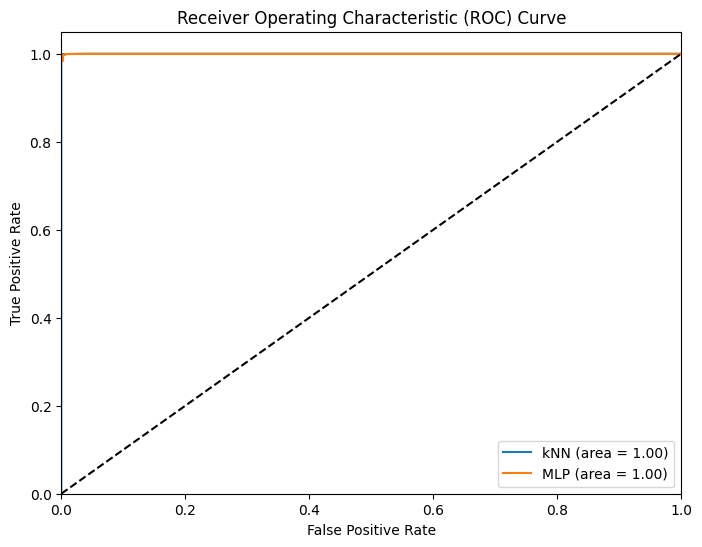

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities of each class for the testing set
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_mlp = best_mlp.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC scores
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

print("AUC-ROC (kNN): {:.2f}".format(roc_auc_knn))
print("AUC-ROC (MLP): {:.2f}".format(roc_auc_mlp))

# Calculate ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
# Calculate ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='kNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [75]:
data.shape

(34365, 68)

# Support vector machine

In [76]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [77]:
#split data
y = data['label']
x = data.drop(['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'label'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=40)


In [78]:
#train model using rbf kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

In [79]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

Accuracy: 99.07%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.99      1.00      1.00     17023

    accuracy                           0.99     17183
   macro avg       0.50      0.50      0.50     17183
weighted avg       0.98      0.99      0.99     17183

[[    0   160]
 [    0 17023]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


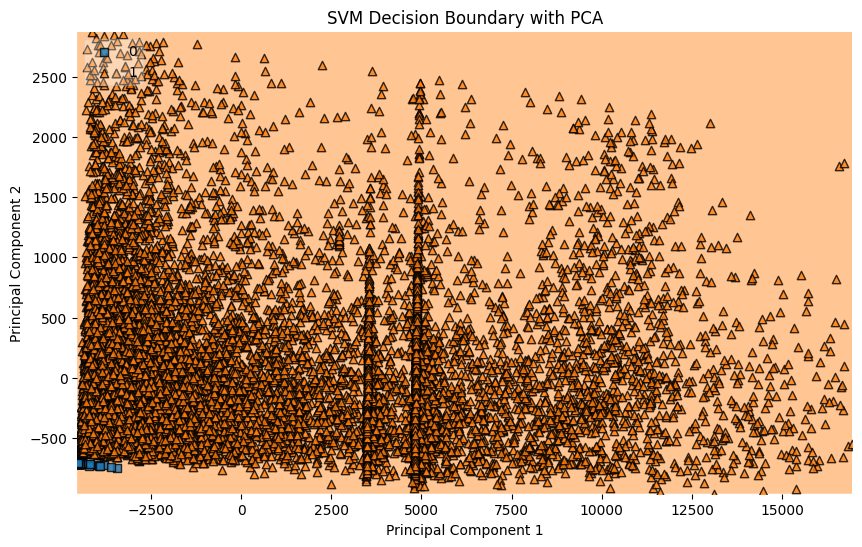

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Refit the SVM model on the reduced data
svm_model.fit(x_train_pca, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(x_train_pca, y_train.values, clf=svm_model, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()



# XGboost

In [81]:
#import libraries
import xgboost as xgb

In [82]:
#intialize model
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', use_label_encoder = False)

#Train the model
xgb_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:27:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [83]:
#model evaluation
y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report: ")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 99.98%

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       160
           1       1.00      1.00      1.00     17023

    accuracy                           1.00     17183
   macro avg       1.00      0.99      1.00     17183
weighted avg       1.00      1.00      1.00     17183


Confusion Matrix: 
[[  157     3]
 [    0 17023]]


In [84]:
#Model evaluation on large sum, unfiltered data

unfiltered_data = pd.read_csv('unfiltered_phishing_data.csv')
x_unfiltered = unfiltered_data.drop(['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'label'], axis = 1)
y_unfiltered = unfiltered_data['label']

y_pred_unfiltered = xgb_model.predict(x_unfiltered)

unfiltered_accuracy = accuracy_score(y_unfiltered,y_pred_unfiltered)
print(f'Unfiltered Accuracy : {unfiltered_accuracy * 100:.2f} %')

print("\nClassification Report")
print(classification_report(y_unfiltered,y_pred_unfiltered))

print("\nConfusion Matrix")
print(confusion_matrix(y_unfiltered,y_pred_unfiltered))

Unfiltered Accuracy : 99.69 %

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11882
           1       1.00      1.00      1.00     37639

    accuracy                           1.00     49521
   macro avg       1.00      0.99      1.00     49521
weighted avg       1.00      1.00      1.00     49521


Confusion Matrix
[[11728   154]
 [    0 37639]]


In [85]:
#hyperparameter tuning usng grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [3,5,7], 'learning_rate' : [0.01,0.1,0.2], 'n_estimators' : [50, 100, 200]}

grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric = 'logloss'), param_grid = param_grid, scoring = 'accuracy', cv = 3)

grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Bets Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Bets Accuracy: 99.99%


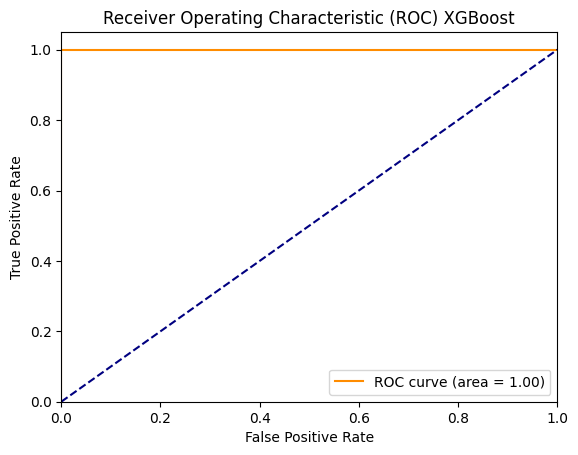

In [86]:
#Plotting AUC-ROC curve

y_pred_proba = grid_search.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) XGBoost')
plt.legend(loc="lower right")
plt.show()


# Advanced model (Decision Trees)

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('filtered_phishing_data.csv')  # Replace with your actual file path

### Preparing the data for decision tree

In [88]:
# Prepare features and target
X = data.drop(['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'], axis=1)  # Drop non-numeric and target columns
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train model using `DecisionTreeClassifier`

In [89]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

### Calcuting Accuracy for Decision Trees

In [90]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00      6805

    accuracy                           1.00      6873
   macro avg       1.00      1.00      1.00      6873
weighted avg       1.00      1.00      1.00      6873


Confusion Matrix:
[[  68    0]
 [   0 6805]]


### Decision Tree AUC-ROC Analysis

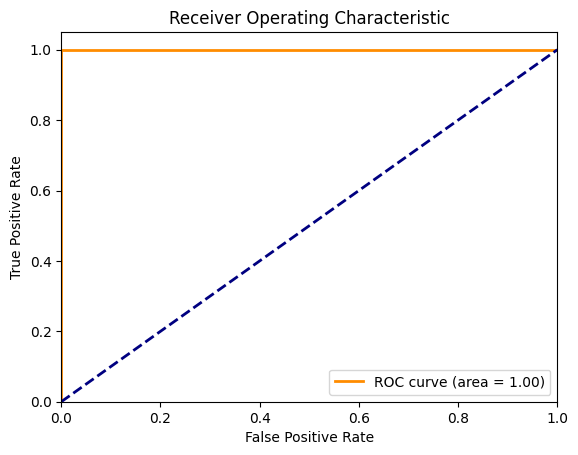

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
y_score = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Advanced NN (Transformer)

In [92]:
!pip install transformers

### Prepare Your Data

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('filtered_phishing_data.csv')  # Replace with your actual file path

# Prepare features and target
X = data['URL']  # Use the URL column as input
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tokenize the URLs for Transformer

In [94]:
from transformers import BertTokenizer

# Load pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the URLs
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Create a Dataset Class

In [95]:
import torch

class URLDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = URLDataset(train_encodings, y_train.tolist())
test_dataset = URLDataset(test_encodings, y_test.tolist())

### Load the Transformer Model

In [96]:
from transformers import BertForSequenceClassification

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [97]:
!pip3 install 'transformers[torch]'
!pip install --upgrade 'accelerate>=0.26.0'
!pip3 show accelerate

Name: accelerate
Version: 1.1.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: peft


### Define Training Arguments

In [98]:
!which python3
!pip install tf-keras

/usr/bin/python3


In [99]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### Train and Evaluate the Model

In [100]:
from transformers import Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define a compute metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.100000,0.075590,0.990106,0.995029,0.990106,1.000000
2,0.000100,0.000039,1.000000,1.000000,1.000000,1.000000
3,0.000100,0.000047,1.000000,1.000000,1.000000,1.000000


{'eval_loss': 4.7176894440781325e-05,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 8.5324,
 'eval_samples_per_second': 805.517,
 'eval_steps_per_second': 12.658,
 'epoch': 3.0}

### Accuracy Testing

In [101]:
# Make predictions
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


AUC-ROC: 1.00


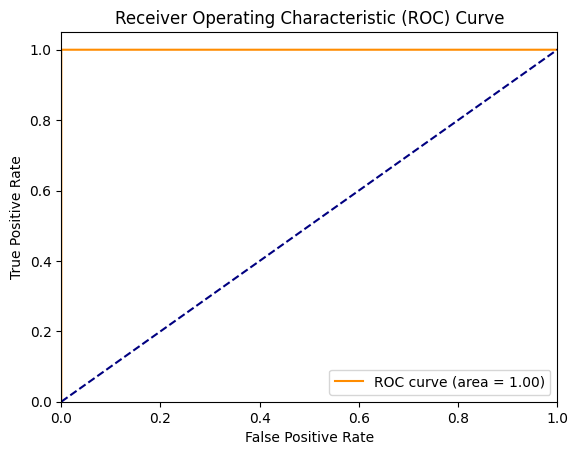

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class
y_prob = predictions.predictions[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()